In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
from ensemble_sampler import *

Populating the interactive namespace from numpy and matplotlib


### Example of sampling from an invariant distribution of SPDE  
Ref. Goodman & Weare, Ensemble Samplers With Affine Invariance  
A problem with this example is that it's harder to visualize, but from the experiments it does seem that pCN has more consistent performance in high dimensions (judging from acceptance probability).

In [9]:
def plot_traj(x):
    n, dim = x.shape
    for i in range(n):
        t = np.linspace(start=0.0, stop=1.0, num=dim)
        plt.plot(t, x[i, :])

In [2]:
dim = 50
nwalkers = 100
niters = 1000
t_dist = SPDE(N=dim)

Not using ensemble, use isotropic gaussian proposal with scale=0.2

In [3]:
dim = 50
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
hist.acceptance_rate

0.050250000000000003

Use ensemble of size 3, scale=0.2.

In [4]:
dim = 50
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print "acceptance_rate", hist.acceptance_rate

../ensemble_sampler/proposal/walk.py:64: RuntimeWarning: covariance is not positive-semidefinite.
  new_pos[i] = rand.multivariate_normal(walkers_to_move[i], scale**2 * cov)


acceptance_rate 0.44945


In [5]:
dim = 100
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), verbose=True, print_every=1000)

====iter 0====
accept [ True]
====iter 1000====
accept [ True]
====iter 2000====
accept [ True]
====iter 3000====
accept [False]
====iter 4000====
accept [False]
====iter 5000====
accept [ True]
====iter 6000====
accept [False]
====iter 7000====
accept [False]
====iter 8000====
accept [ True]
====iter 9000====
accept [False]
====iter 10000====
accept [False]
====iter 11000====
accept [False]
====iter 12000====
accept [False]
====iter 13000====
accept [ True]
====iter 14000====
accept [False]
====iter 15000====
accept [ True]
====iter 16000====
accept [False]
====iter 17000====
accept [ True]
====iter 18000====
accept [False]
====iter 19000====
accept [False]
====iter 20000====
accept [False]
====iter 21000====
accept [ True]
====iter 22000====
accept [ True]
====iter 23000====
accept [False]
====iter 24000====
accept [False]
====iter 25000====
accept [False]
====iter 26000====
accept [False]
====iter 27000====
accept [ True]
====iter 28000====
accept [False]
====iter 29000====
accept [

In [6]:
print "acceptance_rate", hist.acceptance_rate

acceptance_rate 0.33161


Ensemble with pCN, beta=0.2

In [7]:
dim = 50
proposal = PCNWalkMove(s=3, beta=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print "acceptance_rate", hist.acceptance_rate

../ensemble_sampler/proposal/walk.py:62: RuntimeWarning: covariance is not positive-semidefinite.
  + beta * rand.multivariate_normal(np.zeros_like(walkers_to_move[i]), cov)


acceptance_rate 0.90878


In [ ]:
dim = 100
proposal = PCNWalkMove(s=3, beta=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))

In [ ]:
print "acceptance_rate", hist.acceptance_rate

PCN without ensemble, beta=0.2

In [8]:
dim = 50
proposal = PCNWalkMove(s=None, beta=0.01)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print "acceptance_rate", hist.acceptance_rate

acceptance_rate 0.57335


In [ ]:
dim = 100
proposal = PCNWalkMove(s=None, beta=0.01)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))

In [ ]:
print "acceptance_rate", hist.acceptance_rate

In [10]:
x = hist.get_flat("chain")[np.random.choice(100000, 1)]

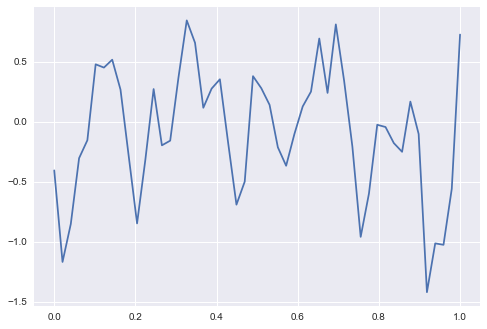

In [11]:
plot_traj(x)